In [1]:
import numpy as np
import scipy as sp
import pandas as pd
from matplotlib import pyplot as plt
from scipy.signal import find_peaks, butter,lfilter,cheby2,buttord
from scipy.fft import fft, ifft

In [2]:
#Load Data
df = pd.read_csv("testScan2.txt", header=None, sep='\t')

In [3]:
df.columns = ['Saturated Absorption','NA', 'Error', 'NaN', 'Voltage']

In [4]:
for i in range(3):
    df['Saturated Absorption'][i] = 0

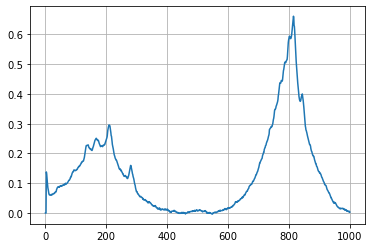

In [5]:
test =fft(np.array(df['Saturated Absorption']))
plt.plot(df['Saturated Absorption'])
plt.grid()



In [25]:
# Apply Filter
N = buttord(.1,.17,.1,3)
print(N)
Wn = 0.11
rs = 5
a,b= butter(N[0],N[1])
filtered= lfilter(a,b,df['Saturated Absorption'])


(4, 0.1579947662026668)


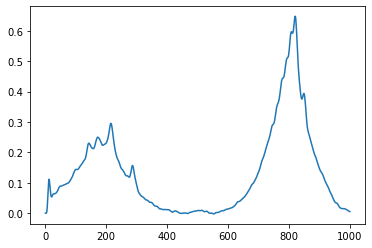

In [26]:
plt.plot(filtered)

950
30
172
[101 143 172 215 286 808 821 849]


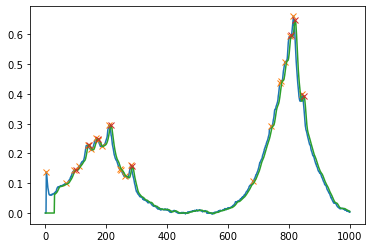

In [27]:
#Find Peaks
for i in range(30):
    filtered[i] = 0
peaks, properties = find_peaks(df['Saturated Absorption'], height=0.10)
peaks_fitted, properties = find_peaks(filtered, prominence=(None,0.1),height=0.10,wlen=11,distance=8)
plt.plot(df['Saturated Absorption'])
plt.plot(peaks,df['Saturated Absorption'][peaks],'x')
c = filtered[::-1]
print(len(c)-np.argmax(c>0.04))
print(np.argmax(filtered>0.04))

for elem in peaks:
    if elem in peaks_fitted:
        print(elem)
print(peaks_fitted)

plt.plot(filtered)
plt.plot(peaks_fitted,filtered[peaks_fitted],'x')

In [18]:
peaks

array([  3,  66,  94, 111, 140, 149, 167, 172, 174, 185, 245, 249, 263,
       280, 682, 742, 771, 775, 787, 802, 844], dtype=int32)

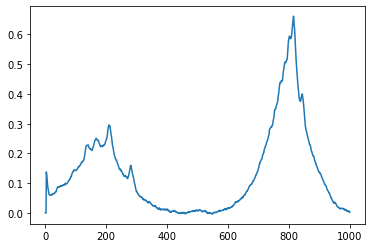

In [10]:
plt.plot(df['Saturated Absorption'])